In [1]:
import os
import json

import boto3
import sagemaker
from sagemaker.pytorch import PyTorchModel
from sagemaker import get_execution_role, Session

sess = Session()
role = get_execution_role()

pt_mnist_model_data = sess.upload_data(
        path="model.tar.gz", bucket=sess.default_bucket(), key_prefix="model/pytorch"
    )

In [2]:
pt_mnist_model_data

's3://sagemaker-us-east-1-689218412889/model/pytorch/model.tar.gz'

In [123]:
model = PyTorchModel(
    entry_point="inference.py",
    source_dir="code",
    role=role,
    model_data=pt_mnist_model_data,
    framework_version="1.10",
    py_version="py38",
)

In [124]:
from sagemaker.serializers import JSONSerializer
from sagemaker.deserializers import JSONDeserializer

instance_type = "ml.m4.xlarge"

predictor = model.deploy(
    initial_instance_count=1,
    instance_type=instance_type,
    serializer=JSONSerializer(),
    deserializer=JSONDeserializer()
)

----------!

In [125]:
dummy_data = {"inputs": "https://ccbd-hair-dye-photos.s3.amazonaws.com/Frame00010-org.jpg"}
res = predictor.predict(dummy_data)

In [132]:
res_img = np.array(res)
res_img.shape

(571, 428)

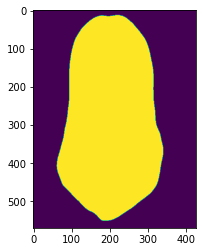

In [130]:
plt.imshow(res_img)